In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [2]:
credit_df = pd.read_csv("german_credit.csv")

In [3]:
#shape of the dataset
credit_df.shape

(1000, 21)

In [4]:
credit_df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
#most of the columns are object types
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

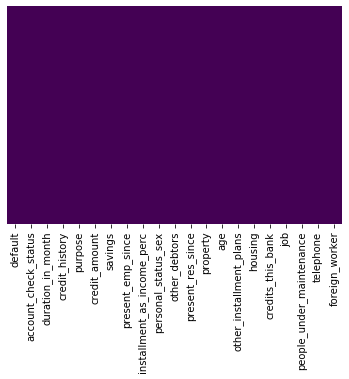

In [9]:
sns.heatmap(credit_df.isna(),yticklabels=False,cbar=False,cmap='viridis')

There are no gaps in the dataset

In [10]:
credit_df.head(10)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [0]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [11]:
#object type columns in original dataset
dummy_cols=credit_df.columns[credit_df.dtypes=='object']
dummy_cols

Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')

converting columns to dummy columns leaving out the first dummy column

In [12]:
credit_df_dummy=pd.get_dummies(credit_df,drop_first=True)

In [13]:
credit_df_dummy.head(10)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,...,1,1,0,0,0,1,0,0,0,1
5,0,36,9055,2,4,35,1,2,0,0,...,1,1,0,0,0,0,0,1,1,1
6,0,24,2835,3,4,53,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
7,0,36,6948,2,2,35,1,1,0,0,...,0,1,0,0,1,0,0,0,1,1
8,0,12,3059,2,4,61,1,1,0,0,...,0,1,0,1,0,0,0,1,0,1
9,1,30,5234,4,2,28,2,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [16]:
#dummy dataset shape
credit_df_dummy.shape

(1000, 49)

In [89]:
credit_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_< 0 DM                                                   1000 non-null uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       1000 non-null uint8
account_chec

In [17]:
corr_matrix=credit_df_dummy.corr()

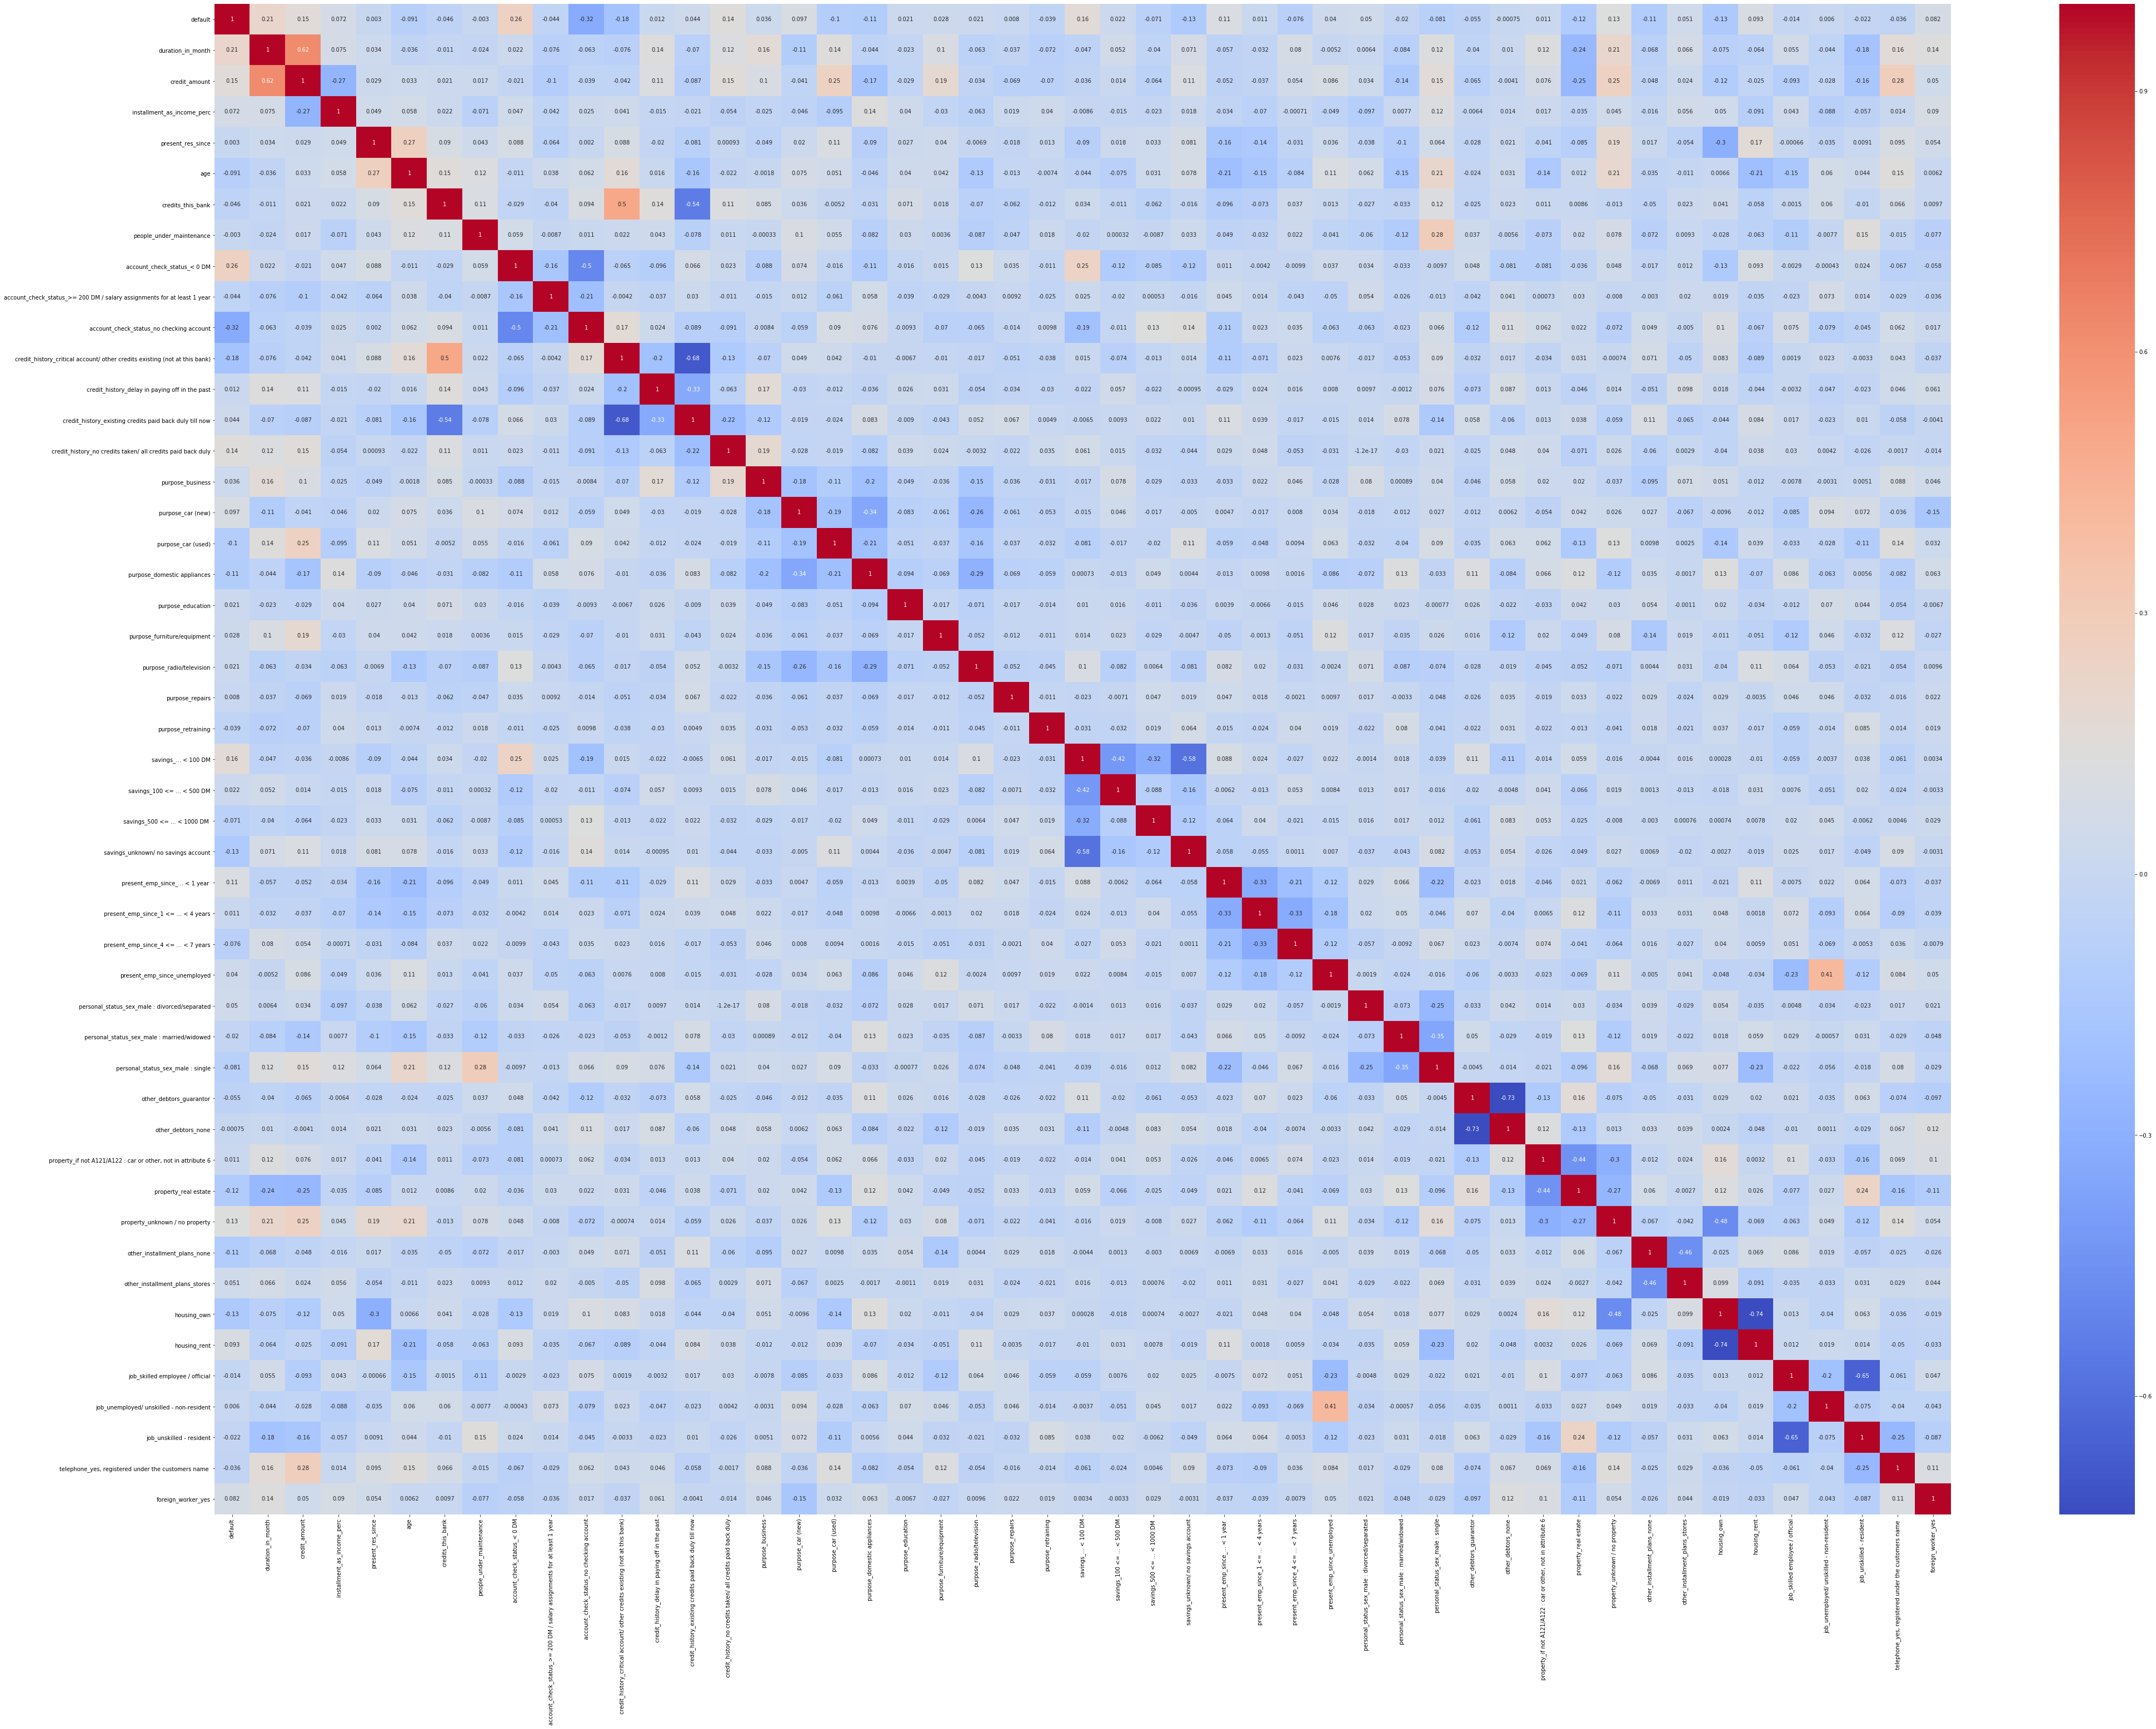

In [98]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(70,50)) 
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [94]:
#printing correlation matrix with correlation between 0.15 and 1
high_corr=corr_matrix.where(corr_matrix.values > 0.15,0)

In [97]:
print(high_corr)

                                                     default  \
default                                             1.000000   
duration_in_month                                   0.214927   
credit_amount                                       0.154739   
installment_as_income_perc                          0.000000   
present_res_since                                   0.000000   
age                                                 0.000000   
credits_this_bank                                   0.000000   
people_under_maintenance                            0.000000   
account_check_status_< 0 DM                         0.258333   
account_check_status_>= 200 DM / salary assignm...  0.000000   
account_check_status_no checking account            0.000000   
credit_history_critical account/ other credits ...  0.000000   
credit_history_delay in paying off in the past      0.000000   
credit_history_existing credits paid back duly ...  0.000000   
credit_history_no credits taken/ all cre

Default target column has good correlation with columns "duration_in_month","credit_amount","amount_check_status<10 (dummy column)" and "saving < 100 (dummy column)".Also, couple of columns are highly inter correlated. For example, columns such as "duration_in_month" and "credit_amount are highly correlated.

### Drop the original variables which are converted to dummy

In [41]:
credit_df.drop(credit_df[dummy_cols],axis=1,inplace=True)

In [43]:
#shape of credit dataset after dropping the original columns converted to dummy
credit_df.shape

(1000, 8)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [44]:
from sklearn.model_selection import train_test_split

X =  credit_df_dummy.drop("default", axis=1)
y =  credit_df_dummy.pop("default")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
RF_model = RandomForestClassifier(n_jobs=2,n_estimators = 500,criterion="entropy",random_state=9999)

In [47]:
#training the random forest classifier model
RF_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [48]:
#predicting test set labels using test set
test_pred = RF_model.predict(test_set)

In [49]:
print(test_pred)

[0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0]


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [50]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels,test_pred)
print(conf_matrix)

[[199  15]
 [ 58  28]]


Text(0.5, 15.0, 'Predicted label')

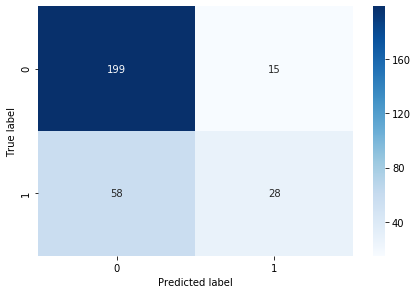

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix,cmap = 'Blues', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [52]:
RF_model.score(test_set , test_labels)
y_predict = RF_model.predict(test_set)
model_score = RF_model.score(test_set, test_labels)
print("Accuracy of Test dataset:->",model_score)
model_score = RF_model.score(train_set, train_labels)
print("Accuracy of Test dataset:->",model_score)

Accuracy of Test dataset:-> 0.7566666666666667
Accuracy of Test dataset:-> 1.0


In [53]:
#classification metrices for Random Forest classifier model
expected = test_labels
predicted = RF_model.predict(test_set)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85       214
           1       0.65      0.33      0.43        86

    accuracy                           0.76       300
   macro avg       0.71      0.63      0.64       300
weighted avg       0.74      0.76      0.73       300



### Q6 Show the list of the features importance( 1 Marks)

In [54]:
#printing feature importance random forest model
print (pd.DataFrame(RF_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

                                                         Imp
duration_in_month                                   0.086042
credit_amount                                       0.116350
installment_as_income_perc                          0.043242
present_res_since                                   0.038028
age                                                 0.090328
credits_this_bank                                   0.021543
people_under_maintenance                            0.012796
account_check_status_< 0 DM                         0.033826
account_check_status_>= 200 DM / salary assignm...  0.009340
account_check_status_no checking account            0.049934
credit_history_critical account/ other credits ...  0.031238
credit_history_delay in paying off in the past      0.010789
credit_history_existing credits paid back duly ...  0.017321
credit_history_no credits taken/ all credits pa...  0.012845
purpose_business                                    0.012067
purpose_car (new)       

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [56]:
# Use below values
num_folds = 10
seed = 77

In [48]:
#Validate the Random Forest model build above using k fold

In [57]:
model=RandomForestClassifier()
kfold=KFold(n_splits=num_folds,random_state=seed)
acc_scores = cross_val_score(model,train_set,train_labels, cv=kfold,scoring='accuracy')
auc_scores = cross_val_score(model,train_set,train_labels,scoring='roc_auc', cv=kfold)
prec_scores = cross_val_score(model,train_set,train_labels,scoring='precision', cv=kfold)
recall_scores = cross_val_score(model,train_set,train_labels, scoring='recall', cv=kfold)
f1_scores = cross_val_score(model,train_set,train_labels, scoring='f1', cv=kfold)
print('ACCURACY:->',acc_scores.mean()*100.0)
print('STD DEV OF ACCURACY:->',acc_scores.std()*100.0)
print('AUC:->',auc_scores.mean()*100.0)
print('PRECISION:->',prec_scores.mean()*100.0)
print('RECALL:->',recall_scores.mean()*100.0)
print ('F1:->',f1_scores.mean()*100.0)

ACCURACY:-> 73.71428571428572
STD DEV OF ACCURACY:-> 5.314592925068082
AUC:-> 75.19100258602802
PRECISION:-> 65.07303807303806
RECALL:-> 33.86367633307399
F1:-> 40.45366773774813


In [0]:
#Calculate Mean score

In [58]:
print('ACCURACY:->',acc_scores.mean()*100.0)

ACCURACY:-> 73.71428571428572


In [0]:
# Calculate score standard deviation using std()

In [59]:
print('STD DEV:->',acc_scores.std()*100.0)

STD DEV:-> 5.314592925068082


# Q8 Print the confusion matrix( 1 Marks)

In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(model, train_set,train_labels, cv=10)
conf_mat = confusion_matrix(train_labels, y_pred)

In [61]:
#printing confusion matrix for train dataset using cross val values
print(conf_mat)

[[439  47]
 [140  74]]


In [62]:
#confusion matrix on train data set without KFOLD
print(metrics.confusion_matrix(expected,predicted))

[[199  15]
 [ 58  28]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [64]:
#classification report on train dataset without kfolds
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85       214
           1       0.65      0.33      0.43        86

    accuracy                           0.76       300
   macro avg       0.71      0.63      0.64       300
weighted avg       0.74      0.76      0.73       300



In [67]:
#accuracy percentage
Accuracy=(199 + 28)/(214 + 86)
print('Accuracy:->',Accuracy)

Accuracy:-> 0.7566666666666667


In [68]:
#sensitivity percentage
Sensitivity=199/257
print('Sensitivity:->',Sensitivity)

Sensitivity:-> 0.77431906614786


In [69]:
#precision percentage
Precision=199/(214)
print('Precision:->',Precision)

Precision:-> 0.9299065420560748


In [80]:
#classification report for dataset run with KFOLDS
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(model, train_set,train_labels, cv=10)
print(metrics.classification_report(train_labels, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       486
           1       0.59      0.35      0.44       214

    accuracy                           0.73       700
   macro avg       0.67      0.62      0.63       700
weighted avg       0.71      0.73      0.70       700



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [81]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [82]:
#runnning bootstrap samples with Random Forest classifier model
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(train_set, train_labels)
    model.fit(X_, y_)
    y_pred = model.predict(test_set)
    
    acc = accuracy_score(y_pred, test_labels)
    accuracy.append(acc)

In [86]:
#printing Accuracy and Standard deviation values for model run using bootstrap sampling.
#As shown below, Standard deviation has greatly reduced but there has been no great difference in the accuracy score of KFOLD and bootstrapping. 
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7263333333333333
Standard deviation:  0.021522597943143894
